In [1]:
#linear regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset. Cells with content “NULL”, “?”, or “NONE” or just blank space will be interpreted as np.NAN
df=pd.read_csv("c:\\users\\amf\\documents\\tips.csv", na_values=['NULL', '?', 'NONE'])

In [3]:
df.shape

(244, 7)

In [4]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.80,24.13,50.81
tip,241.0,2.98,1.41,0.00,2.00,2.88,3.55,10.00
size,244.0,2.57,0.95,1.00,2.00,2.00,3.00,6.00


<AxesSubplot:>

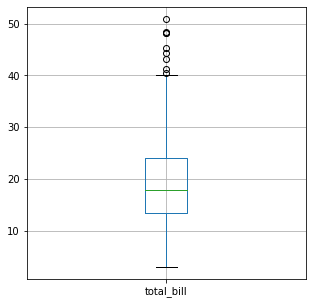

In [7]:
# Can generate boxplot for individual features 
df.boxplot(['total_bill'], figsize=(5, 5))

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

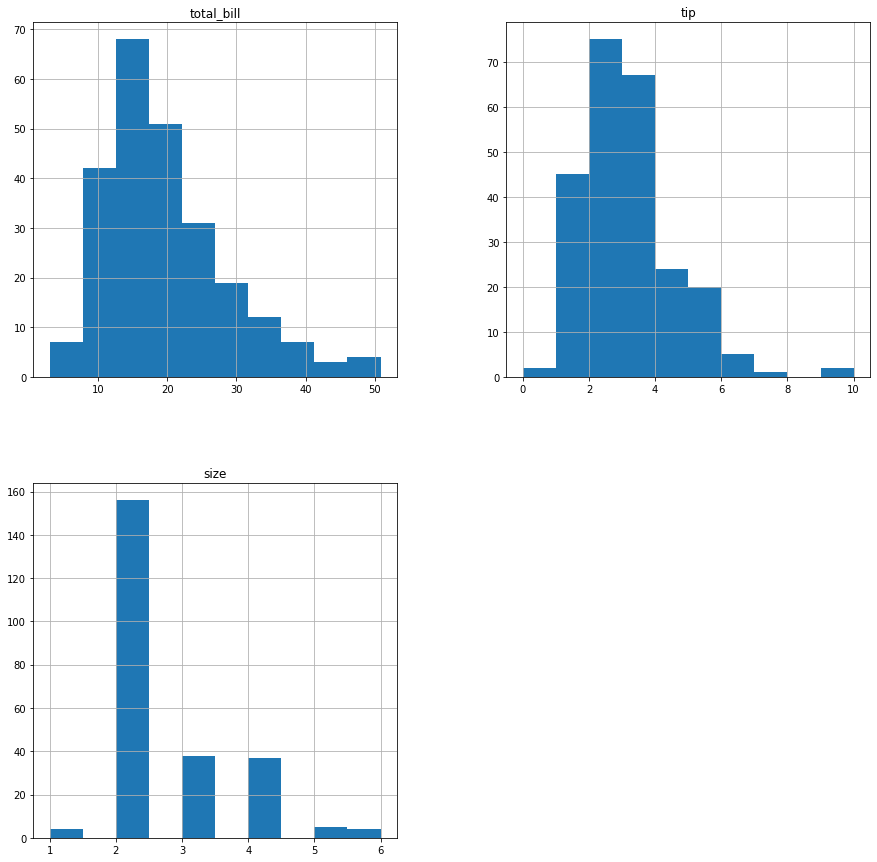

In [8]:
# histogram with specified number of bins
df.hist(bins=10, figsize=(15, 15))

In [9]:
df.info() # provides info on the number of columns have missing values. 
# a quick way to get data types and non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         241 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      240 non-null    object 
 4   day         242 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
# number of values in "total_bill" categorical feature
df['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     18
Name: day, dtype: int64

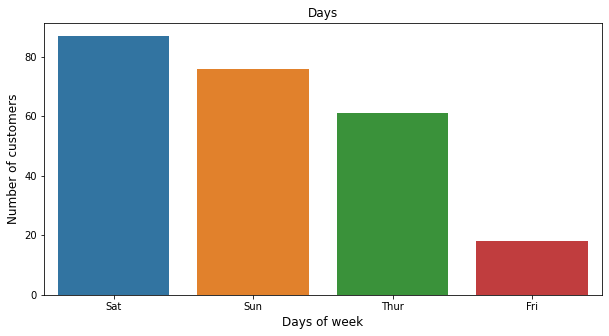

In [11]:
op_count = df['day'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values)
plt.title('Days')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Days of week', fontsize=12)
plt.show()

In [12]:
# Let's examine the categorical features. We can get the number of unique values and the count for the top values. 
# We also get the count of non-null values.
df.select_dtypes(include=['object']).describe().transpose() 

,count,unique,top,freq
sex,244,3,Male,156
smoker,240,2,No,147
day,242,4,Sat,87
time,244,2,Dinner,176


In [13]:
# Get a listing of values in each category
cat=df.select_dtypes('object')
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))

sex = ['Female' 'Male' 'M']
smoker = ['No' nan 'Yes']
day = ['Sun' 'Sat' 'Thur' 'Fri' nan]
time = ['Dinner' 'Lunch']


In [14]:
# Note the inconsistent values 'Male' and 'M'. let's replace 'M' with "Male" to ensure uniformity of text 
df['sex'].replace({'M':"Male"}, inplace=True)
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))

sex = ['Female' 'Male']
smoker = ['No' nan 'Yes']
day = ['Sun' 'Sat' 'Thur' 'Fri' nan]
time = ['Dinner' 'Lunch']


In [15]:
# number of unique values in each feature. 
df.nunique()

total_bill    229
tip           122
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [16]:
# list columns in a decreasing order of number of missing values.
# The to_string() is used to display all the rows.
print(df.isnull().sum().sort_values(ascending=False).to_string())

smoker        4
tip           3
day           2
total_bill    0
sex           0
time          0
size          0


In [17]:
# fill for the missing values
# For "tip" feature, we are going to compute the mean of the tip for all the customers in the same gender, 
# instead of the plain mean for the entire column, and use that to impute. 
df['tip'].fillna(df.groupby("sex")["tip"].transform('mean'), inplace = True) 

In [18]:
df['day'] = df['day'].fillna(df['day']).mode()[0]  # fill day with the mode
print(df.isnull().sum().sort_values(ascending=False).to_string())

smoker        4
total_bill    0
tip           0
sex           0
day           0
time          0
size          0


In [19]:
# use fill-forward method ffill() to fill missing values for 'smoker' feature
df.loc[:,'smoker'] = df.loc[:,'smoker'].ffill()
print(df.isnull().sum().sort_values(ascending=False).to_string())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0


In [20]:
# We can also drop the 'smoker' column if not needed. For example
df.drop(['smoker'], axis=1)

,total_bill,tip,sex,day,time,size
0,16.99,1.01,Female,Sat,Dinner,2
1,10.34,1.66,Male,Sat,Dinner,3
2,21.01,3.50,Male,Sat,Dinner,3
3,23.68,3.31,Male,Sat,Dinner,2
4,24.59,3.61,Female,Sat,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3
240,27.18,2.00,Female,Sat,Dinner,2
241,22.67,2.00,Male,Sat,Dinner,2
242,17.82,1.75,Male,Sat,Dinner,2


In [21]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Text(0.5, 1.0, 'distribution of tip')

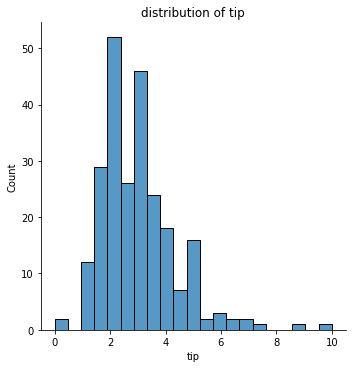

In [22]:
# The plot of the distribution is skewed to the right a bit. Ideally we want normal distributions 
# for linear regression modeling. 
sns.displot(df['tip'])
plt.title('distribution of tip')

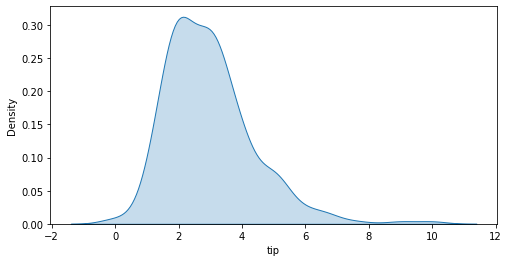

In [23]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df.tip, shade=True)
plt.show()

In [24]:
# examine the tip target value 
df.tip.describe()

count    244.000000
mean       2.975556
std        1.401717
min        0.000000
25%        2.000000
50%        2.900000
75%        3.520000
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:>

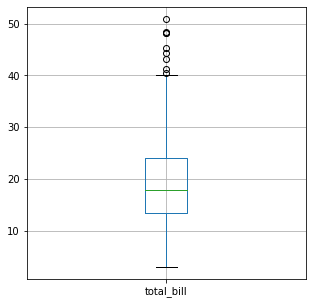

In [25]:
df.boxplot(['total_bill'], figsize=(5,5))

In [26]:
# Clean the outliers
# Identify values greater than max + 1.5* Inetrquartile range and  les that min - 1.5* interquartile range
for x in ['total_bill']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['total_bill'].mean()   # df.dropna(axis=0)
    df.loc[df[x] > max,x] = df['total_bill'].mean()
print(df.isnull().sum().sort_values(ascending=False).to_string())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0


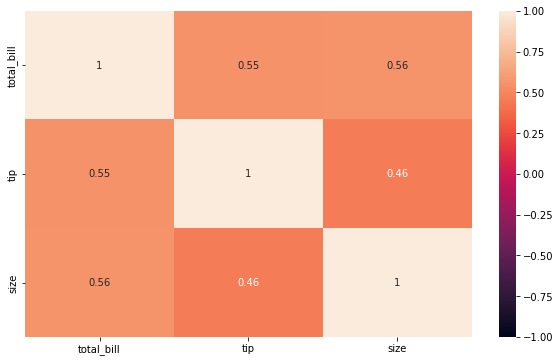

In [27]:
# correlation matrix and heatmap for feature selection
corr=df.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

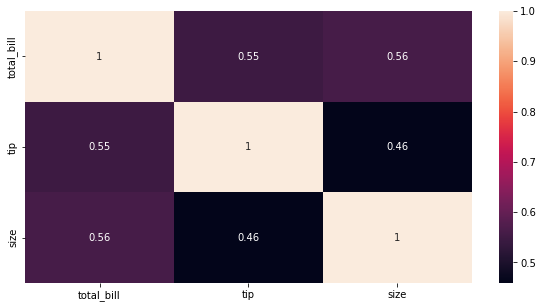

In [28]:
# Only focus on features with correlation factor above 0.5
top_feature = corr.index[corr['total_bill']>0.5]
plt.subplots(figsize=(10, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)

In [29]:
print("Most postively correlated features with the target")
corr.sort_values(['total_bill'], ascending=False, inplace=True)
corr.total_bill

Most postively correlated features with the target


total_bill    1.000000
size          0.559174
tip           0.547090
Name: total_bill, dtype: float64

In [30]:
# Note that the correlation factor between size and total_bill is 0.46. If the features are closely related 
# we could drop one

Handle Text and Categorical Attributes. 
<ol>
<li> A common approach to dealing with textual data is to create one binary attribute for each category of the feature.
This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).  Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors</li>
<li> If the attribute has two states like female/male, then sklean provides the LabelEncoder, which is used here

In [31]:
#### Transforming
# can use ColumTransformer and one-hot-encoder
# ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(), ['gender', 'degree'])], remainder='passthrough')
# For OneHotEncoder with drop='first', the code would look like the following
# ct2 = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), ['gender', 'degree'])], remainder='passthrough')
# Execute Fit_Transform
# ct.fit_transform(df)
#=====================================
# Pandas get_dummies API can also be used for transforming one or more categorical features into dummy numerical features.
# This is one of the most preferred way of one-hot-encoding due to simplicity of the method / API usage.

# For this example we use the LabelEncoder
from sklearn.preprocessing import LabelEncoder
lble = LabelEncoder()
df['sex'] = lble.fit_transform(df['sex'].values)  #female = 0, male = 1

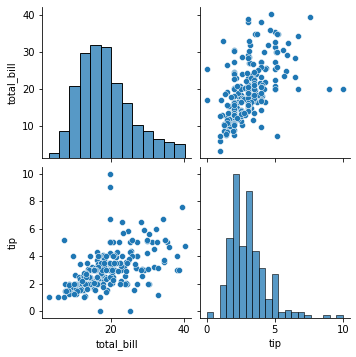

In [32]:
# demo of pairplot in seaborn
sns.pairplot(df,vars=['total_bill','tip'])

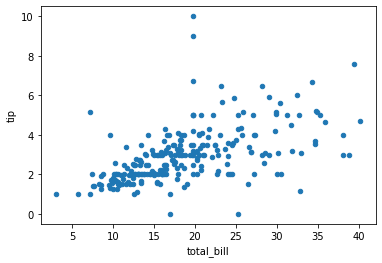

In [33]:
# demo of scatter plot of two features.
df.plot(kind='scatter',x='total_bill',y='tip')
plt.show()

# Linear Regression
<b>Predict taget feature "tip" from the variable "total_bill".</b>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sat,Dinner,2
1,10.34,1.66,1,No,Sat,Dinner,3
2,21.01,3.50,1,No,Sat,Dinner,3
3,23.68,3.31,1,No,Sat,Dinner,2
4,24.59,3.61,0,No,Sat,Dinner,4


In [36]:
#select features X = total_bill and target Y= tip
X = df.iloc[:,0:1].values
Y = df.iloc[:,1:2].values
# Or can use the following approach
#X = df.drop(columns = ['sex', 'smoker', 'day', 'time', 'size', 'tip'])
#Y = df[['tip']]


In [37]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [38]:
# select the model and fit data 
linreg= LinearRegression()
linreg.fit(X_train,y_train) #linear regression model

LinearRegression()

In [39]:
# Make predictions to the test set and compare with the label.
y_pred = linreg.predict(X_test)
resultframe= pd.DataFrame({"y_test": y_test.ravel(), "Y-pred": y_pred.ravel()})
resultframe.head(10)

,y_test,Y-pred
0,3.00,3.047705
1,2.18,3.420431
2,3.31,3.515266
3,3.00,3.085854
4,2.00,2.500747
5,1.50,1.824769
6,3.25,3.412712
7,5.85,3.628848
8,2.31,2.193083
9,2.50,2.286816


In [40]:
mse_loss = mean_squared_error(y_test, y_pred)
print('MSE loss = ',mse_loss)

MSE loss =  1.3625783797614999


In [41]:
print(linreg.coef_, linreg.intercept_)

[[0.11027379]] [0.90398289]


# Linear Logistic Regression
<b>Predict the target value "sex" of the customer from the "tip" amount</b>

In [42]:
#select features X = total_bill and target Y= tip
#X = np.asarray(df.drop(columns = ['total_bill','tip', 'smoker', 'day', 'time', 'size']))
#Y = np.asarray(df['sex'])
X = df.iloc[:,1:2].values
Y = df.iloc[:,2:3].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [44]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 0)

# fit the model with data
logreg.fit(X_train, y_train.ravel()) # ravel to flatten data from a column to row.
y_pred = logreg.predict(X_test)

In [45]:
# Make predictions to the test set and compare with the label.
df2 = pd.DataFrame(y_pred, columns = ['y-pred'])
result= pd.concat([df2, pd.DataFrame(y_test,columns=['label'])], axis = 1 )
result.head(10)

,y-pred,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1


In [46]:
score = logreg.score(X_test, y_test)
print(score)

0.6530612244897959


In [47]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 17]
 [ 0 32]]


In [48]:
print(logreg.coef_, logreg.intercept_)

[[0.10175411]] [0.27839748]


# Decision Trees

In [49]:
#5 Fitting Decision Tree classifier to the Training set
# Create your Decision Tree classifier object here.
from sklearn.tree import DecisionTreeClassifier
#criterion parameter can be entropy or gini. Impurity will increase 
#while the entropy and gini index value 
dtree = DecisionTreeClassifier(criterion='gini',random_state=0) 
dtree.fit(X_train,y_train)
#6 Predicting the Test set results
y_pred = dtree.predict(X_test)

In [50]:
# Predictions to the test set and compare with the label.
y_pred = dtree.predict(X_test)
df2 = pd.DataFrame(y_pred, columns = ['y-pred'])
vertical_concat = pd.concat([df2, pd.DataFrame(y_test,columns=['label'])], axis = 1 )
vertical_concat.head(10)

,y-pred,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,0
7,1,1
8,1,1
9,0,1


In [51]:
# Use score and confusion matrix for error anaysis
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 6 11]
 [ 8 24]]


In [52]:
score = dtree.score(X_test, y_test)
print(score)

0.6122448979591837


# Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=100)

#Train the model using the training sets 
rfc.fit(X_train,y_train.ravel())
y_pred=rfc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


[[ 4 13]
 [ 7 25]]


In [54]:
score = rfc.score(X_test, y_test)
print(score)

0.5918367346938775


# KNN with K = 5

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn5.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [56]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 13]
 [ 7 25]]


In [57]:
score = knn5.score(X_test, y_test)
print(score)

0.5714285714285714


# Suppoer Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)  # also try kernal 'rbf'
svm.fit(X_train, y_train.ravel())

SVC(kernel='linear', random_state=0)

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 13]
 [ 7 25]]


In [60]:
score = svm.score(X_test, y_test)
print(score)

0.6530612244897959


# Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

GaussianNB()

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 13]
 [ 7 25]]


In [63]:
score = nb.score(X_test, y_test)
print(score)

0.6530612244897959


# XGBOOST

In [64]:
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(X_train, y_train.ravel())

[13:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 13]
 [ 7 25]]


In [66]:
score = xg.score(X_test, y_test)
print(score)

0.5918367346938775
